## 1. Import delle librerie necessarie

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Aggiungi il path del progetto per importare i moduli custom
project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"📂 Project root: {project_root}")

📂 Project root: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation


## 2. Scarica il Dataset

Usa questa cella per scaricare il dataset LineMOD preprocessato.

**Nota:** Il download può richiedere alcuni minuti.

In [ ]:
import os
from utils.download_dataset import download_linemod_dataset

# Definisci la directory di output
output_dir = './data'

# Verifica se il dataset è già presente
dataset_path = os.path.join(output_dir, 'Linemod_preprocessed')
if os.path.exists(dataset_path) and os.path.isdir(dataset_path):
    # Verifica che non sia una cartella vuota
    if len(os.listdir(dataset_path)) > 0:
        print(f"Dataset già presente in {dataset_path}. Download saltato.")
    else:
        print(f"Cartella {dataset_path} vuota. Avvio download...")
        download_linemod_dataset(output_dir=output_dir)
else:
    print(f"Dataset non trovato. Avvio download in {output_dir}...")
    download_linemod_dataset(output_dir=output_dir)

📥 Downloading LineMOD preprocessed dataset...
   URL: https://drive.google.com/file/d/1qQ8ZjUI6QauzFsiF8EpaaI2nKFWna_kQ/view?usp=sharing
   Destination: data/Linemod_preprocessed.zip


Downloading...
From (original): https://drive.google.com/uc?id=1qQ8ZjUI6QauzFsiF8EpaaI2nKFWna_kQ
From (redirected): https://drive.google.com/uc?id=1qQ8ZjUI6QauzFsiF8EpaaI2nKFWna_kQ&confirm=t&uuid=930d5bc0-a11a-4abf-9338-0cc3b55d35d9
To: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/data/Linemod_preprocessed.zip
100%|██████████| 8.97G/8.97G [21:38<00:00, 6.91MB/s] 



✅ Download completed!

📦 Extracting dataset...
✅ Extraction completed!

🗑️  Removing zip file...
✅ Extraction completed!

🗑️  Removing zip file...
✅ Cleanup completed!

✨ Dataset successfully downloaded and extracted to: data

📁 Dataset structure:
data/
  .gitkeep
  Linemod_preprocessed/
    segnet_results/
      06_label/
      04_label/
      02_label/
      05_label/
      01_label/
      14_label/
      12_label/
      09_label/
      10_label/
      15_label/
      08_label/
      11_label/
      13_label/
    models/
    data/
      04/
        depth/
        rgb/
        mask/
      05/
        depth/
        rgb/
        mask/
      02/
        mask_all/
        depth/
        rgb/
        mask/
      11/
        depth/
        rgb/
        mask/
      10/
        depth/
        rgb/
        mask/
      09/
        depth/
        rgb/
        mask/
      08/
        depth/
        rgb/
        mask/
      01/
        depth/
        rgb/
        mask/
      06/
        depth/
  

## 3. Esplora la struttura del dataset

In [2]:
# Verifica la struttura del dataset
data_dir = Path('./data')

if data_dir.exists():
    print("📁 Dataset structure:")
    for item in sorted(data_dir.rglob('*')):
        if item.is_dir():
            level = len(item.relative_to(data_dir).parts)
            if level <= 3:  # Mostra solo i primi 3 livelli
                indent = '  ' * level
                print(f"{indent}📁 {item.name}/")
        elif item.is_file() and len(item.relative_to(data_dir).parts) <= 3:
            level = len(item.relative_to(data_dir).parts)
            indent = '  ' * level
            print(f"{indent}📄 {item.name}")
else:
    print("❌ Dataset directory not found! Please run the download cell first.")

📁 Dataset structure:
  📄 .gitkeep
  📁 Linemod_preprocessed/
    📁 data/
      📁 01/
      📁 02/
      📁 04/
      📁 05/
      📁 06/
  📄 .gitkeep
  📁 Linemod_preprocessed/
    📁 data/
      📁 01/
      📁 02/
      📁 04/
      📁 05/
      📁 06/
      📁 08/
      📁 09/
      📁 10/
      📁 11/
      📁 12/
      📁 08/
      📁 09/
      📁 10/
      📁 11/
      📁 12/
      📁 13/
      📁 14/
      📁 15/
    📁 models/
      📄 models_info.yml
      📄 obj_01.ply
      📄 obj_02.ply
      📄 obj_03.ply
      📄 obj_04.ply
      📄 obj_05.ply
      📄 obj_06.ply
      📄 obj_07.ply
      📄 obj_08.ply
      📄 obj_09.ply
      📄 obj_10.ply
      📄 obj_11.ply
      📄 obj_12.ply
      📄 obj_13.ply
      📄 obj_14.ply
      📄 obj_15.ply
    📁 segnet_results/
      📁 01_label/
      📁 02_label/
      📁 04_label/
      📁 05_label/
      📁 06_label/
      📁 08_label/
      📁 13/
      📁 14/
      📁 15/
    📁 models/
      📄 models_info.yml
      📄 obj_01.ply
      📄 obj_02.ply
      📄 obj_03.ply
      📄 obj_04.pl

## 4. Carica il Dataset con CustomDataset

In [3]:
from dataset.custom_dataset import CustomDataset, create_dataloaders

# Percorso al dataset
# Modifica questo path se il dataset è in una posizione diversa
dataset_root = './data/Linemod_preprocessed'

# Crea i dataset train e test
train_dataset = CustomDataset(dataset_root, split='train', train_ratio=0.8, seed=42)
test_dataset = CustomDataset(dataset_root, split='test', train_ratio=0.8, seed=42)

print(f"\n📊 Dataset info:")
print(f"   Training samples: {len(train_dataset)}")
print(f"   Test samples: {len(test_dataset)}")

✅ Dataset initialized: 12640 train samples
✅ Dataset initialized: 3160 test samples

📊 Dataset info:
   Training samples: 12640
   Test samples: 3160


## 5. Visualizza campioni del dataset


Sample #9003


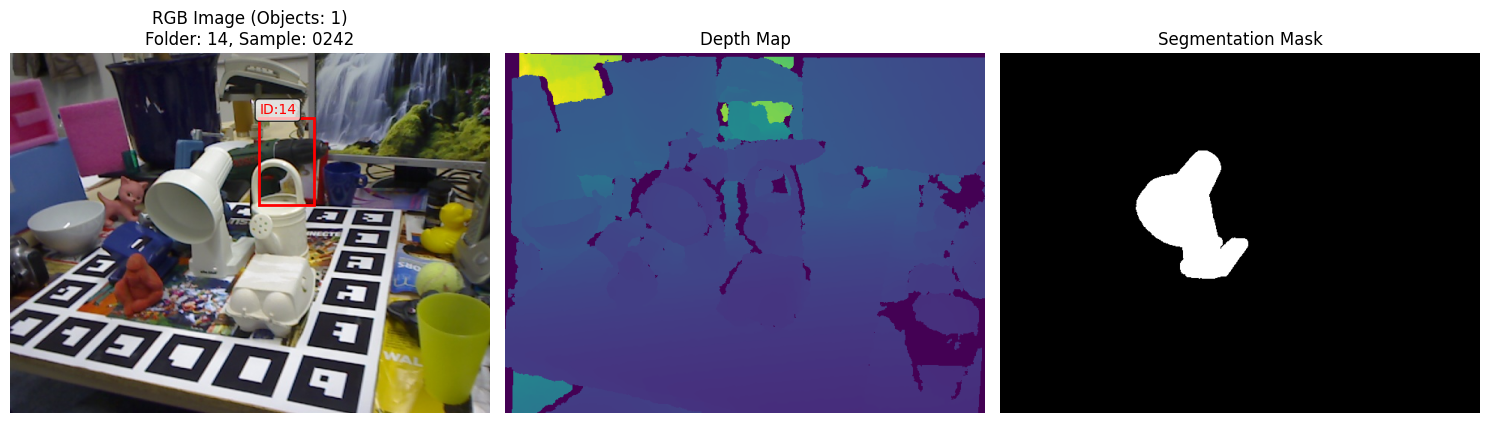


🎯 Found 1 object(s) in this image:

  Object #1 (ID: 14):
    Rotation matrix:
[[-0.00145487  0.993196   -0.116445  ]
 [ 0.89669    -0.0502498  -0.439798  ]
 [-0.442657   -0.105055   -0.890516  ]]
    Translation vector: [  74.9473  -151.71167  996.39813]
    Bounding Box [x, y, w, h]: [332.  86.  73. 116.]

📷 Camera Intrinsics:
[[572.4114    0.      325.2611 ]
 [  0.      573.57043 242.049  ]
 [  0.        0.        1.     ]]

Sample #11959


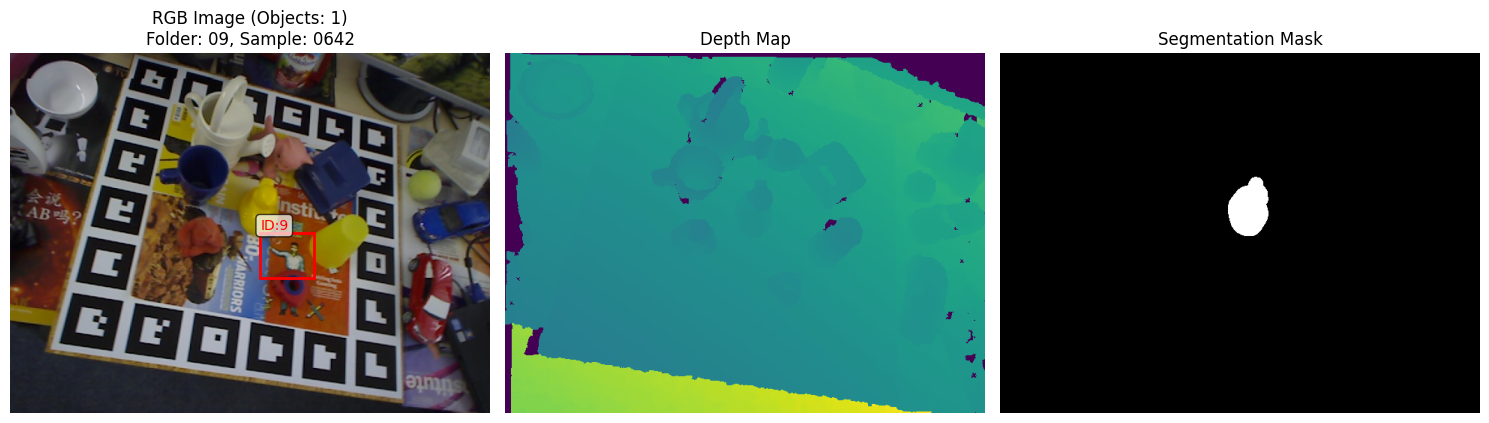


🎯 Found 1 object(s) in this image:

  Object #1 (ID: 9):
    Rotation matrix:
[[ 0.995554  -0.0246045  0.0909228]
 [ 0.032046  -0.819225  -0.572576 ]
 [ 0.0885742  0.572944  -0.814795 ]]
    Translation vector: [ 65.21082  30.60059 822.654  ]
    Bounding Box [x, y, w, h]: [333. 240.  72.  59.]

📷 Camera Intrinsics:
[[572.4114    0.      325.2611 ]
 [  0.      573.57043 242.049  ]
 [  0.        0.        1.     ]]

Sample #1071


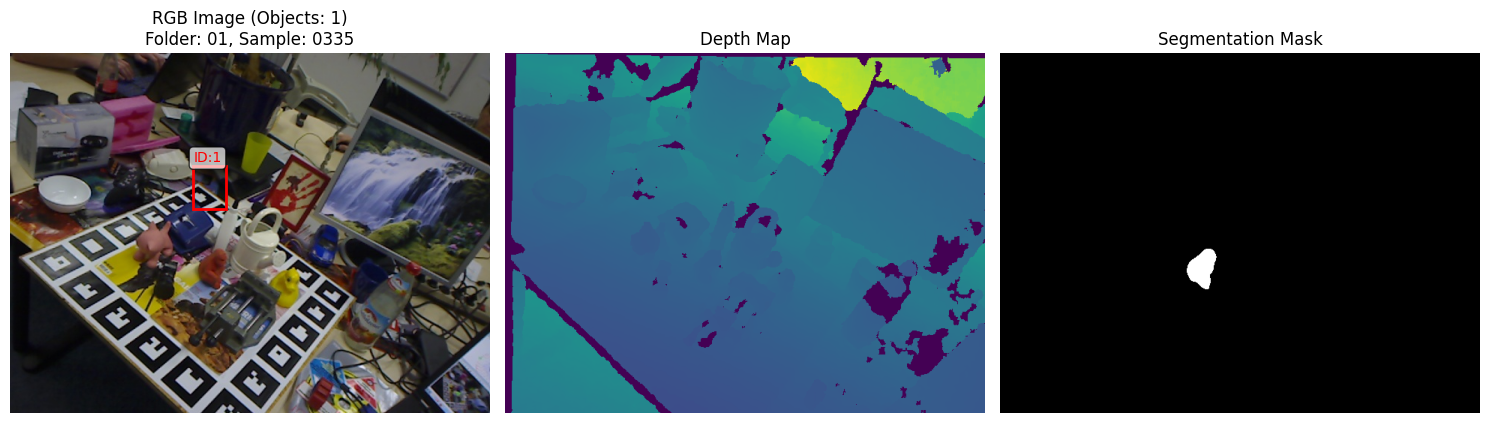


🎯 Found 1 object(s) in this image:

  Object #1 (ID: 1):
    Rotation matrix:
[[ 0.0963063  0.994044   0.0510079]
 [ 0.573321  -0.0135081 -0.81922  ]
 [-0.813651   0.10814   -0.571207 ]]
    Translation vector: [-105.35775  -117.521194 1014.877   ]
    Bounding Box [x, y, w, h]: [244. 150.  44.  58.]

📷 Camera Intrinsics:
[[572.4114    0.      325.2611 ]
 [  0.      573.57043 242.049  ]
 [  0.        0.        1.     ]]


In [4]:
def visualize_sample(sample):
    """
    Visualizza un campione del dataset con TUTTI i bounding box.
    
    Args:
        sample: Un dizionario contenente i dati del campione
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # RGB Image
    rgb = sample['rgb'].permute(1, 2, 0).numpy()
    axes[0].imshow(rgb)
    axes[0].set_title(f"RGB Image (Objects: {sample['num_objects']})\nFolder: {sample['folder_id']:02d}, Sample: {sample['sample_id']:04d}")
    axes[0].axis('off')
    
    # Draw ALL bounding boxes with different colors
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple']
    if sample['num_objects'] > 0:
        from matplotlib.patches import Rectangle
        for i, obj in enumerate(sample['objects']):
            bbox = obj['bbox'].numpy()
            x, y, w, h = bbox
            color = colors[i % len(colors)]
            rect = Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
            axes[0].add_patch(rect)
            # Add object ID label
            obj_id = obj['obj_id']
            axes[0].text(x, y-5, f"ID:{obj_id}", color=color, fontsize=10, 
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    # Depth Map
    if sample['depth'] is not None:
        depth = sample['depth'].numpy()
        axes[1].imshow(depth, cmap='viridis')
        axes[1].set_title("Depth Map")
        axes[1].axis('off')
    
    # Mask
    if sample['mask'] is not None:
        mask = sample['mask'].numpy()
        axes[2].imshow(mask, cmap='gray')
        axes[2].set_title("Segmentation Mask")
        axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Stampa informazioni su TUTTI gli oggetti
    print(f"\n🎯 Found {sample['num_objects']} object(s) in this image:")
    for i, obj in enumerate(sample['objects']):
        print(f"\n  Object #{i+1} (ID: {obj['obj_id']}):")
        print(f"    Rotation matrix:\n{obj['rotation'].numpy()}")
        print(f"    Translation vector: {obj['translation'].numpy()}")
        print(f"    Bounding Box [x, y, w, h]: {obj['bbox'].numpy()}")
    
    if sample['cam_K'] is not None:
        print("\n📷 Camera Intrinsics:")
        print(f"{sample['cam_K'].numpy()}")

# Visualizza 3 campioni casuali
import random
indices = random.sample(range(len(train_dataset)), min(3, len(train_dataset)))

for idx in indices:
    print(f"\n{'='*80}")
    print(f"Sample #{idx}")
    print(f"{'='*80}")
    sample = train_dataset[idx]
    visualize_sample(sample)

## 5.1 Analisi: Quanti oggetti per immagine?

In [ ]:
# Analizza la distribuzione del numero di oggetti per immagine
from collections import Counter

num_objects_per_image = []
for i in range(len(train_dataset)):
    sample = train_dataset[i]
    num_objects_per_image.append(sample['num_objects'])

# Statistiche
obj_counter = Counter(num_objects_per_image)
print("📊 Distribuzione oggetti per immagine nel training set:\n")
for num_objs in sorted(obj_counter.keys()):
    count = obj_counter[num_objs]
    percentage = (count / len(train_dataset)) * 100
    print(f"   {num_objs} oggetto/i: {count} immagini ({percentage:.1f}%)")

print(f"\n📈 Statistiche:")
print(f"   Totale immagini: {len(train_dataset)}")
print(f"   Media oggetti per immagine: {np.mean(num_objects_per_image):.2f}")
print(f"   Max oggetti in un'immagine: {max(num_objects_per_image)}")
print(f"   Min oggetti in un'immagine: {min(num_objects_per_image)}")

# Visualizza istogramma
plt.figure(figsize=(10, 5))
plt.bar(obj_counter.keys(), obj_counter.values(), color='steelblue', edgecolor='black')
plt.xlabel('Numero di oggetti per immagine')
plt.ylabel('Numero di immagini')
plt.title('Distribuzione del numero di oggetti per immagine')
plt.xticks(list(obj_counter.keys()))
plt.grid(axis='y', alpha=0.3)
plt.show()

## 5.2 Visualizza campioni con TUTTI i bounding box

## 6. Crea DataLoaders per il training

In [6]:
# Crea train e test loaders
train_loader, test_loader = create_dataloaders(
    dataset_root=dataset_root,
    batch_size=4,
    num_workers=0,
    train_ratio=0.8,
    seed=42
)

# Test di un batch
print("\n🔍 Testing a batch from train_loader...")
for batch in train_loader:
    print(f"   RGB batch shape: {batch['rgb'].shape}")
    if batch['depth'] is not None:
        print(f"   Depth batch shape: {batch['depth'].shape}")
    if batch['mask'] is not None:
        print(f"   Mask batch shape: {batch['mask'].shape}")
    print(f"   Batch contains {len(batch['folder_id'])} samples")
    break

✅ Dataset initialized: 12640 train samples
✅ Dataset initialized: 3160 test samples

📊 DataLoaders created:
   Training batches: 3160
   Test batches: 790

🔍 Testing a batch from train_loader...


/Users/nicolotermine/Library/Caches/pypoetry/virtualenvs/polito-aml-6d-pose-estimation-LevBIKLF-py3.13/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


   RGB batch shape: torch.Size([4, 3, 480, 640])
   Depth batch shape: torch.Size([4, 480, 640])
   Mask batch shape: torch.Size([4, 480, 640, 3])
   Batch contains 4 samples


## 7. Esplora il contenuto di gt.yml e info.yml

In [7]:
import yaml

# Trova il primo gt.yml disponibile
gt_file = next(Path(dataset_root).rglob('gt.yml'), None)
info_file = next(Path(dataset_root).rglob('info.yml'), None)

if gt_file:
    print("📄 Ground Truth (gt.yml) content:")
    with open(gt_file, 'r') as f:
        gt_data = yaml.safe_load(f)
        # Il file YAML ha struttura: {sample_id: [list of objects]}
        if isinstance(gt_data, dict):
            first_key = list(gt_data.keys())[0]
            print(f"Sample ID: {first_key}")
            if isinstance(gt_data[first_key], list):
                print(yaml.dump(gt_data[first_key][0], default_flow_style=False))
            else:
                print(yaml.dump(gt_data[first_key], default_flow_style=False))
        else:
            print(yaml.dump(gt_data[0], default_flow_style=False))

if info_file:
    print("\n📄 Info (info.yml) content:")
    with open(info_file, 'r') as f:
        info_data = yaml.safe_load(f)
        # Il file YAML ha struttura: {sample_id: [list of objects]}
        if isinstance(info_data, dict):
            first_key = list(info_data.keys())[0]
            print(f"Sample ID: {first_key}")
            # Controlla se la chiave esiste e che tipo di dato è
            if first_key in info_data:
                if isinstance(info_data[first_key], list) and len(info_data[first_key]) > 0:
                    print(yaml.dump(info_data[first_key][0], default_flow_style=False))
                else:
                    print(yaml.dump(info_data[first_key], default_flow_style=False))
            else:
                print("Struttura non standard, mostra tutto:")
                print(yaml.dump(info_data, default_flow_style=False))
        else:
            print(yaml.dump(info_data[0] if isinstance(info_data, list) else info_data, default_flow_style=False))

📄 Ground Truth (gt.yml) content:
Sample ID: 0
cam_R_m2c:
- -0.061734
- 0.99215603
- -0.108696
- 0.77404898
- -0.0211604
- -0.63277203
- -0.630108
- -0.123199
- -0.76667202
cam_t_m2c:
- 103.57929656
- 49.49001985
- 1040.43577706
obj_bb:
- 344
- 228
- 77
- 84
obj_id: 4


📄 Info (info.yml) content:
Sample ID: 0
cam_K:
- 572.4114
- 0.0
- 325.2611
- 0.0
- 573.57043
- 242.04899
- 0.0
- 0.0
- 1.0
depth_scale: 1.0

Sample ID: 0
cam_R_m2c:
- -0.061734
- 0.99215603
- -0.108696
- 0.77404898
- -0.0211604
- -0.63277203
- -0.630108
- -0.123199
- -0.76667202
cam_t_m2c:
- 103.57929656
- 49.49001985
- 1040.43577706
obj_bb:
- 344
- 228
- 77
- 84
obj_id: 4


📄 Info (info.yml) content:
Sample ID: 0
cam_K:
- 572.4114
- 0.0
- 325.2611
- 0.0
- 573.57043
- 242.04899
- 0.0
- 0.0
- 1.0
depth_scale: 1.0

